<a href="https://colab.research.google.com/github/sogand73/OCT-Classification/blob/main/representative_dictionary_learning_for_OCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import MiniBatchDictionaryLearning

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download paultimothymooney/kermany2018/

100% 10.8G/10.8G [01:52<00:00, 126MB/s]
100% 10.8G/10.8G [01:52<00:00, 103MB/s]


In [4]:
!unzip kermany2018.zip

Streaming output truncated to the last 5000 lines.
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8050636-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-4.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-5.jpeg  
  inflating: 

In [ ]:
!pip install ultralytics

In [7]:
import shutil
shutil.rmtree('/content/oct_my_dictl_dataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_dictl_dataset'

In [8]:
import os
!mkdir '/content/oct_my_dictl_dataset'


In [9]:
classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
for subfolder in classes:
  dictl_subfolder = os.path.join('/content/oct_my_dictl_dataset/',subfolder)

  os.makedirs(dictl_subfolder, exist_ok=True)

In [53]:
from PIL import Image
import cv2

In [77]:
# Define source and destination directories
dataset_folder = '/content/OCT2017 /train/'  # Replace with your source folder path

destination_folder = '/content/oct_my_dictl_dataset/'  # Replace with your destination folder path
images =[]
for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_copy = os.listdir(source_folder)

  # Copy each image file from the source folder to the destination folder
  for file_name in files_to_copy[:10]:
    if file_name.endswith('.jpeg'):  # Specify the image file formats
          source_path = os.path.join(source_folder, file_name)
          destination_path = os.path.join(destination_folder, subfolder) + '/'
          shutil.copy(source_path, destination_path)
          img = Image.open(os.path.join(destination_path, file_name)) # This returns an image object
          #print(img.mode)
          #img = img.convert('RGB')
          img = np.asarray(img) # convert it to ndarray
          img = cv2.resize(img, (512, 512))
          images.append(img)
#return np.array(images)
          #print(f"Copied: {file_name}")


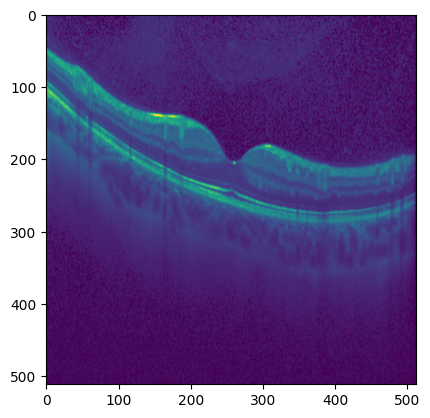

In [78]:
import matplotlib.pyplot as plt
plt.imshow(images[2])

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d

# Load dictionary learning images
image_data = np.asarray(images)
n_images, height, width = image_data.shape

In [84]:
# Flatten the image data
X = image_data.reshape((n_images, height * width))

# Explicitly cast the array to float before division
X = X.astype(float)

# Rescale pixel values to the range [0, 1] for MiniBatchDictionaryLearning
X /= 255.0


# CLASSES: 'NORMAL', 'DME', 'DRUSEN', 'CNV'
X_NORMAL, X_DME, X_DRUSEN, X_CNV = X[:10], X[10:20], X[20:30], X[30:]

In [186]:
# Create a dictionary learning model for NORMAL data
n_components = 100  # Number of atoms in the dictionary
alpha = 1.0  # Sparsity controlling parameter
batch_size = 10  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

dl_model = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)



# Fit the model to the flattened NORMAL image data
dl_model.fit(X_NORMAL)
ATOMS_NORMAL = dl_model.components_
X_NORMAL_tr = dl_model.transform(X_NORMAL)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [188]:
# Create a dictionary learning model for DME data
n_components = 100  # Number of atoms in the dictionary
alpha = 1.0  # Sparsity controlling parameter
batch_size = 10  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

dl_model_DME = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)



# Fit the model to the flattened DME image data
dl_model_DME.fit(X_DME)
ATOMS_DME = dl_model_DME.components_
X_DME_tr = dl_model_DME.transform(X_DME)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [189]:
# Create a dictionary learning model for DRUSEN data
n_components = 100  # Number of atoms in the dictionary
alpha = 1.0  # Sparsity controlling parameter
batch_size = 10  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

dl_model_DRUSEN = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)



# Fit the model to the flattened DRUSEN image data
dl_model_DRUSEN.fit(X_DRUSEN)
ATOMS_DRUSEN = dl_model_DRUSEN.components_
X_DRUSEN_tr = dl_model_DRUSEN.transform(X_DRUSEN)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [190]:
# Create a dictionary learning model for CNV data
n_components = 100  # Number of atoms in the dictionary
alpha = 1.0  # Sparsity controlling parameter
batch_size = 10  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

dl_model_CNV = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)



# Fit the model to the flattened CNV image data
dl_model_CNV.fit(X_CNV)
ATOMS_CNV = dl_model_CNV.components_
X_CNV_tr = dl_model_CNV.transform(X_CNV)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


0.893
2.0944745419894653e-14


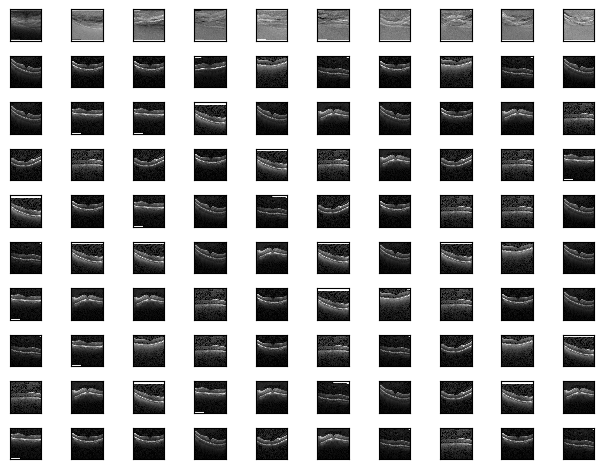

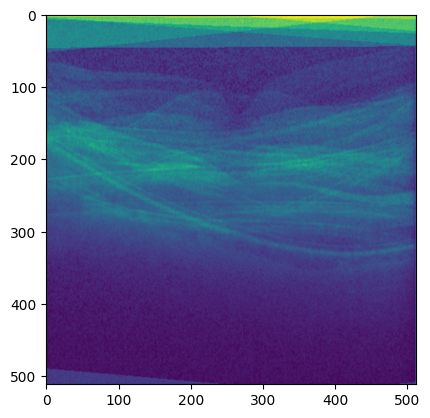

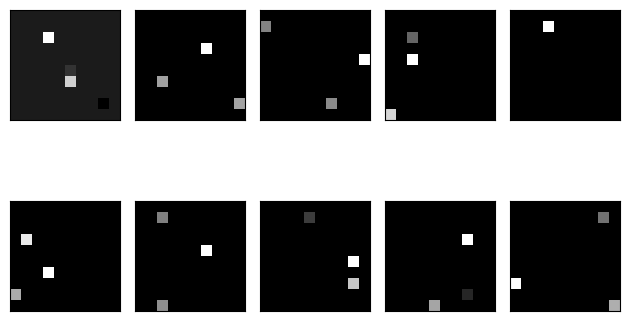

In [214]:
#NORMAL data

#Feature extraction percent
print(np.mean(X_NORMAL_tr == 0))
X_NORMAL_hat = X_NORMAL_tr @ dl_model.components_
print(np.mean(np.sum((X_NORMAL_hat - X_NORMAL) ** 2, axis=1) / np.sum(X_NORMAL ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_NORMAL
fig, axes = plt.subplots(nrows=10, ncols=10)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, cmap = 'gray', interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[0].reshape((height, width))*255)

#################################

# Visualize transformed images
representatives = X_NORMAL_tr
fig, axes = plt.subplots(nrows=2, ncols=5)
axes = axes.flatten()

for i in range(X_NORMAL_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((10, 10))*255, cmap = 'gray', interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


0.87
9.162597147831753e-14


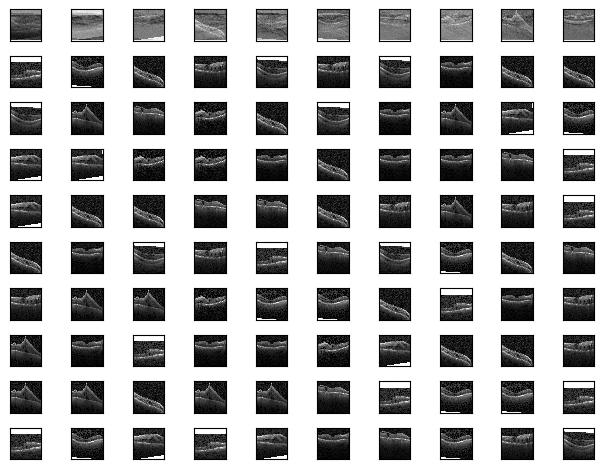

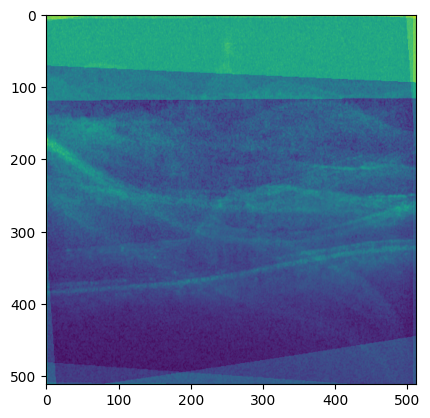

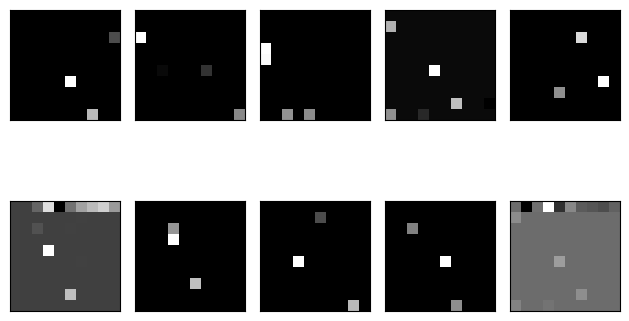

In [215]:
#DME data

#Feature extraction percent
print(np.mean(X_DME_tr == 0))
X_DME_hat = X_DME_tr @ dl_model_DME.components_
print(np.mean(np.sum((X_DME_hat - X_DME) ** 2, axis=1) / np.sum(X_DME ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_DME
fig, axes = plt.subplots(nrows=10, ncols=10)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, cmap = 'gray', interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[0].reshape((height, width))*255)

#################################

# Visualize transformed images
representatives = X_DME_tr
fig, axes = plt.subplots(nrows=2, ncols=5)
axes = axes.flatten()

for i in range(X_DME_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((10, 10))*255, cmap = 'gray', interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


0.886
4.897507038157611e-13


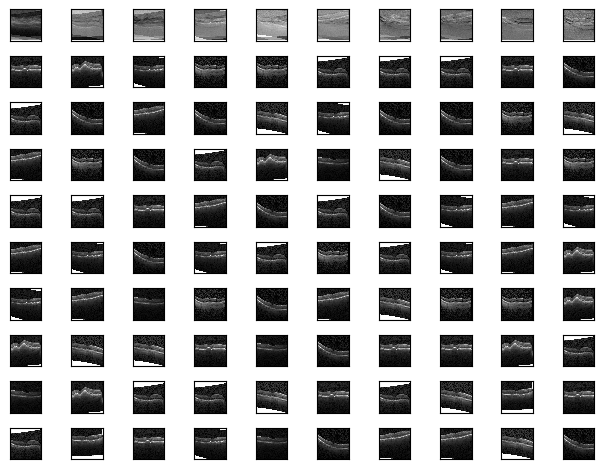

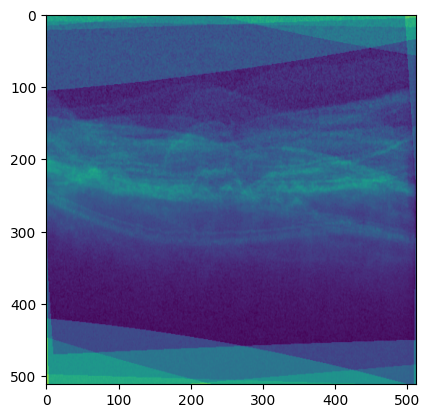

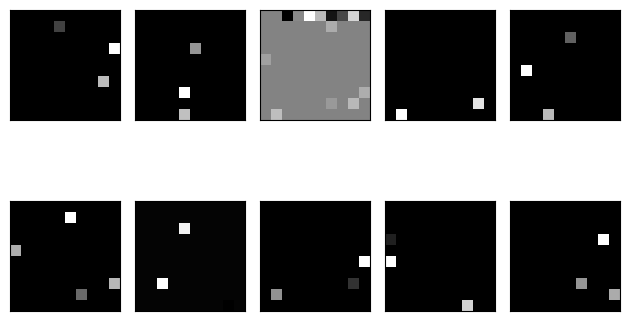

In [216]:
#DRUSEN data

#Feature extraction percent
print(np.mean(X_DRUSEN_tr == 0))
X_DRUSEN_hat = X_DRUSEN_tr @ dl_model_DRUSEN.components_
print(np.mean(np.sum((X_DRUSEN_hat - X_DRUSEN) ** 2, axis=1) / np.sum(X_DRUSEN ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_DRUSEN
fig, axes = plt.subplots(nrows=10, ncols=10)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, cmap = 'gray', interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[0].reshape((height, width))*255)

#################################

# Visualize transformed images
representatives = X_DRUSEN_tr
fig, axes = plt.subplots(nrows=2, ncols=5)
axes = axes.flatten()

for i in range(X_DRUSEN_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((10, 10))*255, cmap = 'gray', interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


0.874
1.5486485022493687e-13


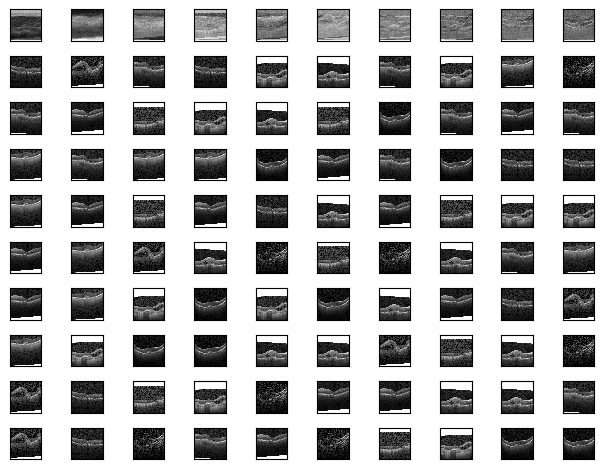

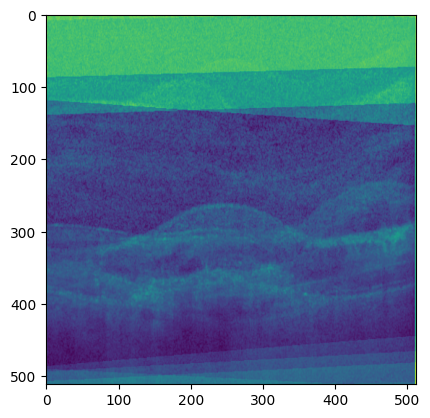

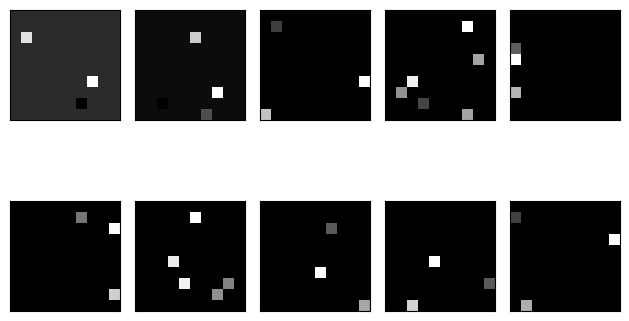

In [217]:
#CNV data

#Feature extraction percent
print(np.mean(X_CNV_tr == 0))
X_CNV_hat = X_CNV_tr @ dl_model_CNV.components_
print(np.mean(np.sum((X_CNV_hat - X_CNV) ** 2, axis=1) / np.sum(X_CNV ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_CNV
fig, axes = plt.subplots(nrows=10, ncols=10)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, cmap = 'gray', interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[0].reshape((height, width))*255)

#################################

# Visualize transformed images
representatives = X_CNV_tr
fig, axes = plt.subplots(nrows=2, ncols=5)
axes = axes.flatten()

for i in range(X_CNV_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((10, 10))*255, cmap = 'gray', interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


In [114]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 6.0 MB/s eta 0:00:00


In [115]:
shutil.rmtree('/content/oct_my_dataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_dataset'

In [116]:
import os
!mkdir '/content/oct_my_dataset'
!mkdir '/content/oct_my_dataset/train'
!mkdir '/content/oct_my_dataset/test'
#!mkdir '/content/oct_my_dataset/val'


In [117]:
classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
for subfolder in classes:
  train_subfolder = os.path.join('/content/oct_my_dataset/train/',subfolder)
  test_subfolder = os.path.join('/content/oct_my_dataset/test/',subfolder)
  #val_subfolder = os.path.join('/content/oct_my_dataset/val/',subfolder)
  os.makedirs(train_subfolder, exist_ok=True)
  os.makedirs(test_subfolder, exist_ok=True)
  #os.makedirs(val_subfolder, exist_ok=True)

In [118]:
import shutil


# Define source and destination directories
dataset_folder = '/content/OCT2017 '  # Replace with your source folder path

destination_folder = '/content/oct_my_dataset/'  # Replace with your destination folder path

#for folder in [['train/',500], ['test/',100], ['val/',8]]
for folder in [['train/',500], ['test/',100]]:
  for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
    # List files in the source folder
    source_folder = os.path.join(dataset_folder, folder[0], subfolder) + '/'
    files_to_copy = os.listdir(source_folder)

    # Copy each image file from the source folder to the destination folder
    for file_name in files_to_copy[:folder[1]]:
        if file_name.endswith('.jpeg'):  # Specify the image file formats
            source_path = os.path.join(source_folder, file_name)
            destination_path = os.path.join(destination_folder, folder[0], subfolder) + '/'
            shutil.copy(source_path, destination_path)
            #print(f"Copied: {file_name}")


In [197]:
shutil.rmtree('/content/oct_my_trdataset')

In [198]:
import os
!mkdir '/content/oct_my_trdataset'
!mkdir '/content/oct_my_trdataset/train'
!mkdir '/content/oct_my_trdataset/test'
#!mkdir '/content/oct_my_dataset/val'

In [199]:
classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
for subfolder in classes:
  train_subfolder = os.path.join('/content/oct_my_trdataset/train/',subfolder)
  test_subfolder = os.path.join('/content/oct_my_trdataset/test/',subfolder)
  #val_subfolder = os.path.join('/content/oct_my_trdataset/val/',subfolder)
  os.makedirs(train_subfolder, exist_ok=True)
  os.makedirs(test_subfolder, exist_ok=True)
  #os.makedirs(val_subfolder, exist_ok=True)

In [200]:
import shutil


# Define source and destination directories
dataset_folder = '/content/OCT2017 '  # Replace with your source folder path

destination_folder = '/content/oct_my_trdataset/'  # Replace with your destination folder path

for folder in [['train/',500], ['test/',100]]:
  for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
    # List files in the source folder
    source_folder = os.path.join(dataset_folder, folder[0], subfolder) + '/'
    files_to_copy = os.listdir(source_folder)

    # Copy each image file from the source folder to the destination folder
    for file_name in files_to_copy[:folder[1]]:
        if file_name.endswith('.jpeg'):  # Specify the image file formats
            source_path = os.path.join(source_folder, file_name)
            destination_path = os.path.join(destination_folder, folder[0], subfolder) + '/'
            #shutil.copy(source_path, destination_path)
            img = Image.open(source_path) # This returns an image object
            #print(img.mode)
            #img = img.convert('RGB')
            img = np.asarray(img) # convert it to ndarray
            img = cv2.resize(img, (512, 512))
            img = img.reshape((1, 512 * 512))
            img = img.astype(float)
            img /= 255.0

            if subfolder == 'NORMAL':
              img_tr = dl_model.transform(img)
            elif subfolder == 'DME':
              img_tr = dl_model_DME.transform(img)
            elif subfolder == 'DRUSEN':
              img_tr = dl_model_DRUSEN.transform(img)
            else:
              img_tr = dl_model_CNV.transform(img)

            img_tr2d = img_tr.reshape((10, 10))*255
            # Create a PIL Image from the NumPy array
            #image_to_save = Image.fromarray(img_tr.reshape((10, 10))*255)
            #image_to_save = image_to_save.convert('RGB')
            # Save the image to the specified directory
            save_destination = os.path.join(destination_path, file_name)
            #image_to_save.save(save_destination)
            cv2.imwrite(save_destination, img_tr2d)


            #images.append(img_tr2d)
            #print(f"Copied: {file_name}")


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the di

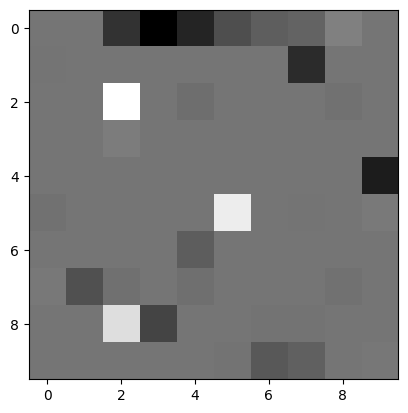

In [201]:
plt.imshow(img_tr.reshape((10, 10))*255, cmap='gray', interpolation='nearest')


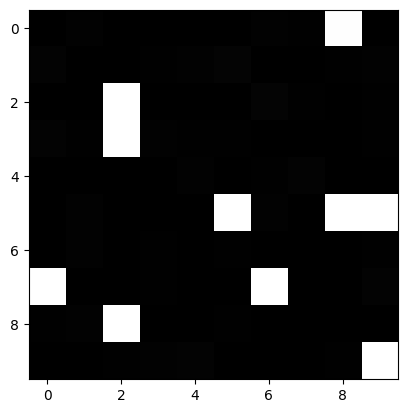

In [204]:
z = cv2.imread(save_destination)
plt.imshow(z)

In [212]:
from ultralytics import YOLO

# Load a model

#model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
model = YOLO('/content/runs/classify/train5/weights/best.pt') #Load the initial weights, gained from the former model training on this data (previous line)

# model = YOLO('yolov8n-cls.yaml')  # build a new model from YAML
# model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
# model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/oct_my_trdataset', epochs=30, imgsz=10, batch=64)

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=/content/runs/classify/train5/weights/best.pt, data=/content/oct_my_trdataset, epochs=30, time=None, patience=50, batch=64, imgsz=10, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning /content/oct_my_trdataset/train... 2000 images, 0 corrupt: 100%|██████████| 2000/2000 [00:00<?, ?it/s]
val: Scanning /content/oct_my_trdataset/test... 400 images, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


WARNING ⚠️ TensorBoard graph visualization failure Expected more than 1 value per channel when training, got input size torch.Size([1, 256, 1, 1])
30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  9.76it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  7.40it/s]

                   all      0.775          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.33it/s]

                   all      0.772          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.23it/s]

                   all       0.78          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.16it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.17it/s]

                   all       0.76          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  9.13it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.56it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.19it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


      10/30         0G      1.035         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.06it/s]

                   all      0.803          1



      Epoch    GPU_mem       loss  Instances       Size


      11/30         0G      1.091         16         32: 100%|██████████| 32/32 [00:07<00:00,  4.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  9.86it/s]

                   all      0.805          1



      Epoch    GPU_mem       loss  Instances       Size


      12/30         0G      1.041         16         32: 100%|██████████| 32/32 [00:09<00:00,  3.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.08it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


      13/30         0G     0.9922         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.32it/s]

                   all      0.808          1



      Epoch    GPU_mem       loss  Instances       Size


      14/30         0G      1.038         16         32: 100%|██████████| 32/32 [00:07<00:00,  4.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  9.22it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


      15/30         0G      1.003         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  9.74it/s]

                   all      0.808          1



      Epoch    GPU_mem       loss  Instances       Size


      16/30         0G     0.9925         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  9.73it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


      17/30         0G      1.004         16         32: 100%|██████████| 32/32 [00:07<00:00,  4.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  9.84it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


      18/30         0G      1.005         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  9.96it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


      19/30         0G     0.9789         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  9.72it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


      20/30         0G     0.9948         16         32: 100%|██████████| 32/32 [00:07<00:00,  4.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  8.23it/s]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


      21/30         0G      1.007         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  8.98it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


      22/30         0G      1.011         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.04it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


      23/30         0G      0.992         16         32: 100%|██████████| 32/32 [00:07<00:00,  4.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  7.25it/s]

                   all      0.832          1



      Epoch    GPU_mem       loss  Instances       Size


      24/30         0G      1.004         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.03it/s]

                   all      0.795          1



      Epoch    GPU_mem       loss  Instances       Size


      25/30         0G     0.9696         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  9.81it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


      26/30         0G      0.991         16         32: 100%|██████████| 32/32 [00:07<00:00,  4.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  7.50it/s]

                   all      0.817          1



      Epoch    GPU_mem       loss  Instances       Size


      27/30         0G     0.9892         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  9.75it/s]

                   all      0.817          1



      Epoch    GPU_mem       loss  Instances       Size


      28/30         0G     0.9992         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  8.45it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


      29/30         0G      0.959         16         32: 100%|██████████| 32/32 [00:07<00:00,  4.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  7.57it/s]


                   all      0.837          1

      Epoch    GPU_mem       loss  Instances       Size


      30/30         0G     0.9618         16         32: 100%|██████████| 32/32 [00:08<00:00,  3.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.04it/s]

                   all       0.85          1



30 epochs completed in 0.075 hours.
Optimizer stripped from runs/classify/train7/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train7/weights/best.pt, 3.0MB

Validating runs/classify/train7/weights/best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1440004 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/oct_my_trdataset/train... found 2000 images in 4 classes ✅ 
val: None...
test: /content/oct_my_trdataset/test... found 400 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]


                   all       0.85          1
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train7
Results saved to runs/classify/train7


In [206]:
# Validate the modelblob:https://colab.research.google.com/f8428635-acf6-400f-b52f-379198002792
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1440004 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/oct_my_trdataset/train... found 2000 images in 4 classes ✅ 
val: None...
test: /content/oct_my_trdataset/test... found 400 images in 4 classes ✅ 


TypeError: expected str, bytes or os.PathLike object, not NoneType

In [210]:
# Predict with the model
results = model('/content/oct_my_dataset/test/CNV/CNV-1290410-3.jpeg')  # predict on an image


image 1/1 /content/oct_my_dataset/test/CNV/CNV-1290410-3.jpeg: 32x32 CNV 0.54, NORMAL 0.23, DME 0.14, DRUSEN 0.09, 12.8ms
Speed: 6.8ms preprocess, 12.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
